Number of nodes: 100
Number of edges: 9511


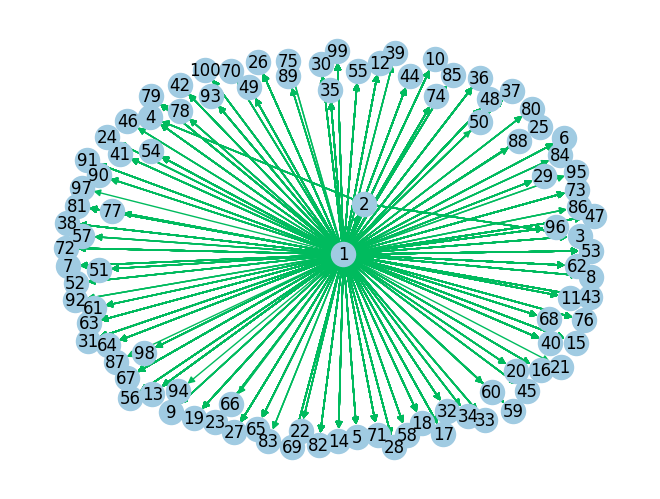

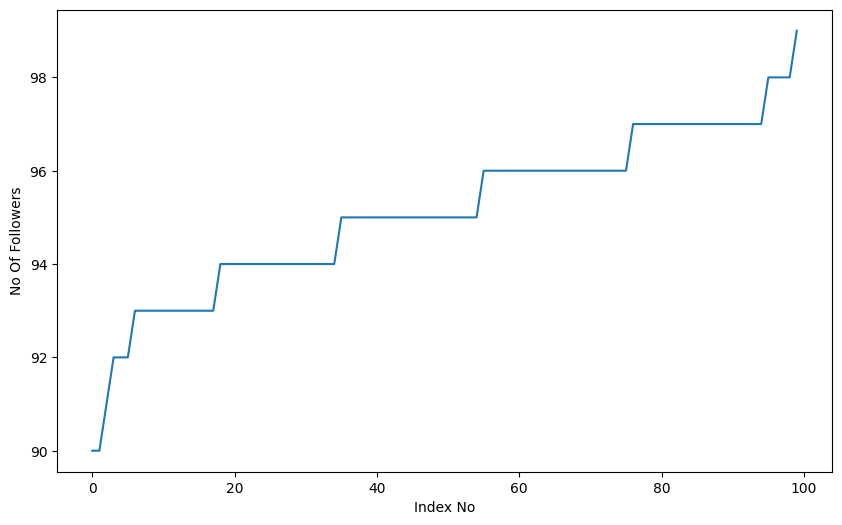

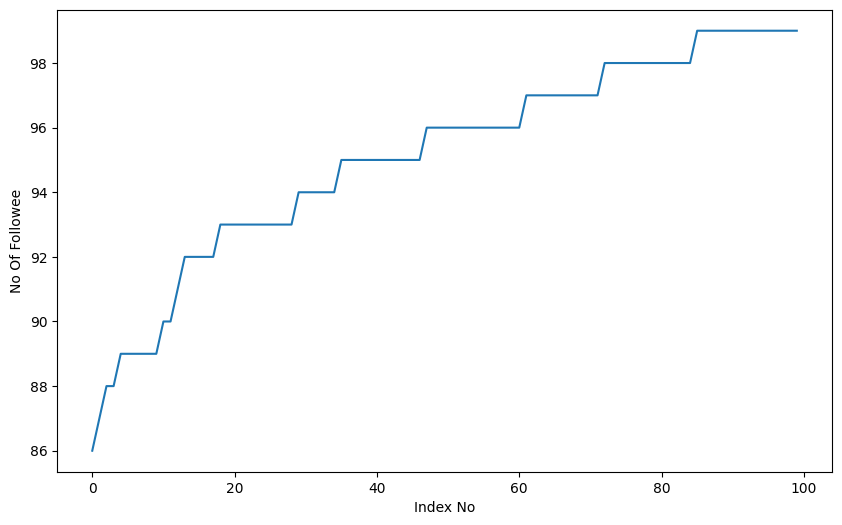

In [6]:

import pandas as pd
import math
fileloc = "C:/Users/Siddhanth/Downloads/cyberbullying-data-20250103T124900Z-001/cyberbullying-data/"
df=pd.read_csv(fileloc + "5. Communication_Data_Among_Users.csv")
df = df[['User1 ID','User2 ID']]
df.to_csv(fileloc+'train_woheader.csv',header=False,index=False)
import networkx as nx
g=nx.read_edgelist(fileloc+'train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")

import matplotlib.pyplot as plt
pd.read_csv(fileloc+"5. Communication_Data_Among_Users.csv",nrows=2000)[['User1 ID','User2 ID']].to_csv(fileloc+'train_woheader_sample.csv',header=False,index=False)
subgraph=nx.read_edgelist(fileloc+'train_woheader_sample.csv',delimiter=',',create_using=nx.MultiDiGraph(),nodetype=int)
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig(fileloc+'graph_sample.pdf')
# print(nx.info(subgraph))

indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followee')
plt.show()




In [2]:
import numpy as np
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))    

print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
        sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist))
print('No of persons who have no followers' ,sum(np.array(indegree_dist)==0),'and % is',
        sum(np.array(indegree_dist)==0)*100/len(indegree_dist))

90 percentile value is 99.0
91 percentile value is 99.0
92 percentile value is 99.0
93 percentile value is 99.0
94 percentile value is 99.0
95 percentile value is 99.0
96 percentile value is 99.0
97 percentile value is 99.0
98 percentile value is 99.0
99 percentile value is 99.0
100 percentile value is 99.0
99.1 percentile value is 99.0
99.2 percentile value is 99.0
99.3 percentile value is 99.0
99.4 percentile value is 99.0
99.5 percentile value is 99.0
99.6 percentile value is 99.0
99.7 percentile value is 99.0
99.8 percentile value is 99.0
99.9 percentile value is 99.0
100.0 percentile value is 99.0
No of persons those are not following anyone are 0 and % is 0.0
No of persons who have no followers 0 and % is 0.0


In [3]:
import random
import csv
r = csv.reader(open(fileloc+'train_woheader.csv','r'))
edges = dict()
print("hello")
for edge in r:
    edges[(edge[0], edge[1])] = 1
missing_edges = set([])

while (len(missing_edges)<9511):
    a=random.randint(1, 200)
    b=random.randint(1, 200)
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            # adding points who less likely to be friends
            if nx.shortest_path_length(g,source=a,target=b) > 2: 
                missing_edges.add((a,b))
            else:
                continue  
        except:  
            missing_edges.add((a,b))              
    else:
        continue

import pickle
len(missing_edges)
pickle.dump(missing_edges,open(fileloc+'missing_edges_final.p','wb'))

    
df_pos = pd.read_csv(fileloc + "5. Communication_Data_Among_Users.csv")[['User1 ID','User2 ID']]
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])

df_neg


hello


,source_node,destination_node
0,44,155
1,32,101
2,197,168
3,150,93
4,95,157
...,...,...
9506,26,165
9507,125,144
9508,199,93
9509,42,146


In [4]:
from sklearn.model_selection import train_test_split



X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
#removing header and saving
X_train_pos.to_csv(fileloc+'train_pos_after_eda.csv',header=False, index=False)
X_test_pos.to_csv(fileloc+'test_pos_after_eda.csv',header=False, index=False)
X_train_neg.to_csv(fileloc+'train_neg_after_eda.csv',header=False, index=False)
X_test_neg.to_csv(fileloc+'test_neg_after_eda.csv',header=False, index=False)

import os

if (os.path.isfile(fileloc+'train_pos_after_eda.csv')) and (os.path.isfile(fileloc+'test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist(fileloc+'train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist(fileloc+'test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#     print(nx.info(train_graph))
#     print(nx.info(test_graph))
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)




if (not os.path.isfile(fileloc+'train_after_eda.csv')) and (not os.path.isfile(fileloc+'test_after_eda.csv')) and  (not os.path.isfile(fileloc+'train_y.csv')) and  (not os.path.isfile(fileloc+'test_y.csv')) and  (os.path.isfile(fileloc+'train_pos_after_eda.csv')) and  (os.path.isfile(fileloc+'test_pos_after_eda.csv')) and  (os.path.isfile(fileloc+'train_neg_after_eda.csv')) and  (os.path.isfile(fileloc+'test_neg_after_eda.csv')):
    X_train_pos = pd.read_csv(fileloc+'train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv(fileloc+'test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv(fileloc+'train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv(fileloc+'test_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_train = pd.concat([X_train_pos, X_train_neg], ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = pd.concat([X_test_pos, X_test_neg], ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
X_train.to_csv(fileloc+'train_after_eda.csv',header=False,index=False)
X_test.to_csv(fileloc+'test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv(fileloc+'train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv(fileloc+'test_y.csv',header=False,index=False)



def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1


wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

pr = nx.pagerank(train_graph, alpha=0.85)
pickle.dump(pr,open(fileloc+'page_rank.p','wb'))
mean_pr=float(sum(pr.values())) / len(pr)



import networkx as nx
import pickle
import os

# File location for saving Katz centrality
output_dir = '/Users/lakshay/Documents/CyberBullying/cyberbullying-data/fea_sample/'
output_file = os.path.join(output_dir, 'katz.p')

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Compute Katz centrality
try:
    katz = nx.katz_centrality(train_graph, alpha=0.005, beta=1, tol=1e-06)
    pickle.dump(katz, open(output_file, 'wb'))
    mean_katz = sum(katz.values()) / len(katz)
    print(f"Mean Katz Centrality: {mean_katz}")
except nx.NetworkXError as e:
    print(f"Error in Katz centrality computation: {e}")

katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
pickle.dump(katz,open(fileloc+'fea_sample/katz.p','wb'))



hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
pickle.dump(hits,open(fileloc+'fea_sample/hits.p','wb'))

# filename = fileloc+'train_after_eda.csv'
# n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
# s = 50000 #desired sample size
# skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
# filename = fileloc+'test_after_eda.csv'
# n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
# s = 5000 #desired sample size
# skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))            



df_final_train = pd.read_csv(fileloc+'train_after_eda.csv', names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv(fileloc+'train_y.csv', names=['indicator_link'])
df_final_train.head(2)
y_train = df_final_train['indicator_link']

#test 
df_final_test = pd.read_csv(fileloc+'test_after_eda.csv', names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv(fileloc+'test_y.csv', names=['indicator_link'])
df_final_test.head(2)
y_test=df_final_test['indicator_link']

#mapping jaccrd followers to train and test data
df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
										jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
										jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

#mapping jaccrd followees to train and test data
df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
										jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
										jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)


	#mapping jaccrd followers to train and test data
df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
										cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
										cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

#mapping jaccrd followees to train and test data
df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
										cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
										cosine_for_followees(row['source_node'],row['destination_node']),axis=1)



def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees
df_final_train['num_followers_s'], df_final_train['num_followers_d'],df_final_train['num_followees_s'], df_final_train['num_followees_d'],df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
df_final_test['num_followers_s'], df_final_test['num_followers_d'],df_final_test['num_followees_s'],df_final_test['num_followees_d'],df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)

#mapping adar index on train
df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
#mapping adar index on test
df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

#--------------------------------------------------------------------------------------------------------
#mapping followback or not on train
df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

#mapping followback or not on test
df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

#--------------------------------------------------------------------------------------------------------
#mapping same component of wcc or not on train
df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

##mapping same component of wcc or not on train
df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

#--------------------------------------------------------------------------------------------------------
#mapping shortest path on train 
df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
#mapping shortest path on test
df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
#================================================================================

#Katz centrality score for source and destination in Train and test
#if anything not there in train graph then adding mean katz score
df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
#================================================================================
hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
pickle.dump(hits,open(fileloc+'hits.p','wb'))
#Hits algorithm score for source and destination in Train and test
#if anything not there in train graph then adding 0
df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
#================================================================================

#Hits algorithm score for source and destination in Train and Test
#if anything not there in train graph then adding 0
df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))

fname=fileloc+'finaltrdata.csv'
df_final_train.to_csv(fname)
fname=fileloc+'finaltsdata.csv'
df_final_test.to_csv(fname)

Mean Katz Centrality: 0.09999450987968304
